## 2. Machine Learning for Regression


In [2]:
import pandas as pd
import numpy as np

c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 2.2 Data preparation

In [219]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [220]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [221]:
strings_columns = list(df.dtypes[df.dtypes == 'object'].index)
strings_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [222]:
for col in strings_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [223]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

### What Features does the dataset contain?

This dataset contains multiple columns (features):

- **make:** The car's brand (e.g., BMW, Toyota, etc.)
- **model:** The car's specific model
- **year:** The manufacturing year of the car
- **engine_fuel_type:** The type of fuel required by the engine (e.g., diesel, electric, etc.)
- **engine_hp:** The engine's horsepower
- **engine_cylinders:** The number of engine cylinders
- **transmission_type:** The type of transmission (automatic or manual)
- **driven_wheels:** Front, rear, or all-wheel drive
- **number_of_doors:** The number of doors in the car
- **market_category:** Market segment (e.g., luxury, crossover, etc.)
- **vehicle_size:** The size classification (compact, midsize, or large)
- **vehicle_style:** The body style (e.g., sedan or convertible)
- **highway_mpg:** Fuel efficiency on the highway (measured in miles per gallon)
- **city_mpg:** Fuel efficiency in the city (measured in miles per gallon)
- **popularity:** The number of times the car was mentioned in a Twitter stream
- **msrp:** The manufacturer's suggested retail price

Our primary focus in this dataset is the MSRP column, which represents the car's price. We will use this column to predict car prices.

## 2.3 Exploratory data analysis

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

The **MSRP** column holds crucial data, as it represents our target variable, the `y`, which is the value we aim to predict accurately.

A vital initial step in exploratory data analysis is examining the distribution of `y`. By doing so, we gain insight into the possible values of `y` and their frequency of occurrence. This visualization is commonly referred to as a histogram, which effectively conveys the distribution of our target variable.

Distribution of price

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


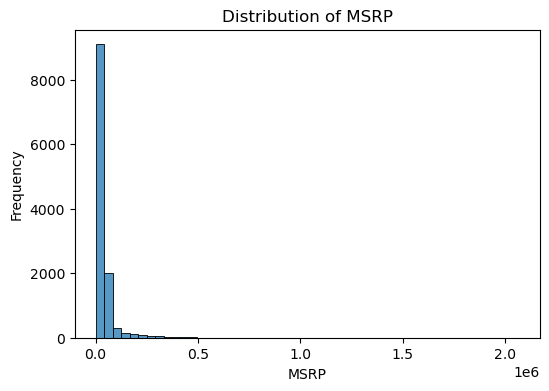

In [38]:
# Vehicle MSRP distribution
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp, bins=50)
plt.ylabel('Frequency')
plt.xlabel('MSRP')
plt.title('Distribution of MSRP')

plt.show()
# long tail distribution

**Long-Tail Distribution:**

Visualizing the long-tail distribution can be challenging due to the extreme values that make it difficult to discern the shape of the distribution. Training a model on this type of data can also be problematic, as the distribution may cause confusion for the model, hindering its ability to learn the important features effectively.

c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


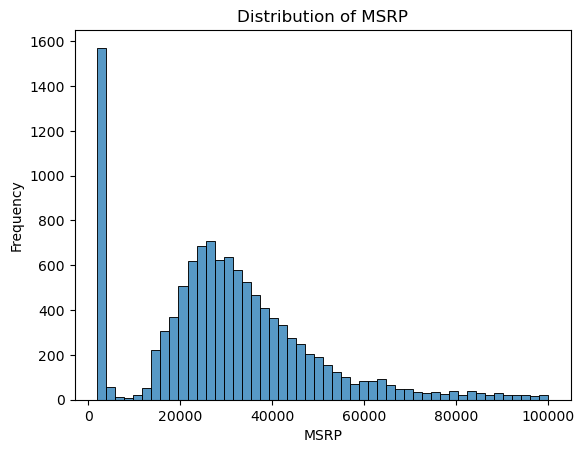

In [44]:
# zooming in on the data to see a more normalized view

sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.ylabel('Frequency')
plt.xlabel('MSRP')
plt.title('Distribution of MSRP')

plt.show()

c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of MSRP')

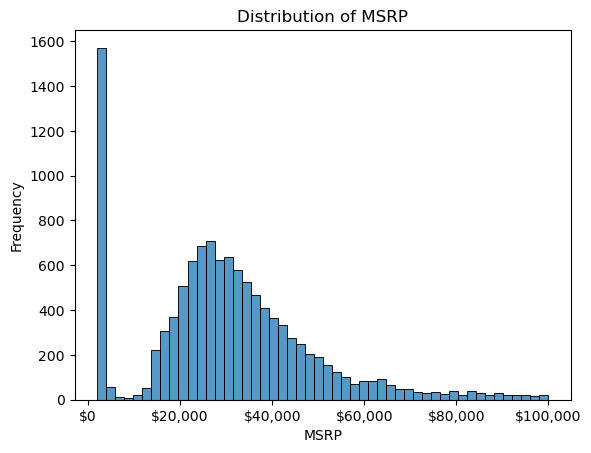

In [39]:
import matplotlib.ticker as mtick

sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.ylabel('Frequency')
plt.xlabel('MSRP')
plt.title('Distribution of MSRP')

**Closer look at the data:**

By taking a closer look at values below `$100,000`, we are able to take a closer look at the distribution. There is a high frequency of vehicles with a low **`MSRP`**, but the count rapidly drops off. Looking at the right-side of the Histogram, we can more closely see the **long-tail distribution**. 

The histogram suggests that the data is **right-skewed (positively skewed)** distribution, this is common for price data because:
- Prices have a natural floor *(can't be negative)*
- No theoretical upper limit *(luxury/exotic vehicles)*
- Most products cluster around affordable ranges
- Few extremely expensive outliers stretch the tail

In [51]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

**Log**

```python
np.log1p
```

log1p is a mathematical function that computes the natural logarithm of (1 + x), where x is your input value. In NumPy, it's accessed as `np.log1p(x)`, and it's mathematically equivalent to $\log(1 + x)$, but with crucial numerical advantages.

**Training Note:**

An important gotcha to remember: when you train a model on log-transformed targets, your predictions will also be in log-space. To convert them back to the original scale (MPG values), you'll need to use the inverse operation: `np.expm1(predictions)`, which computes $e^x - 1$. This reverses the log1p transformation and gives you interpretable fuel efficiency values.
```

In [59]:
# using log to normalize the msrp values
price_logs = np.log1p(df.msrp)

After transformation, the distribution looks more normal (bell-shaped), which:
- Makes linear regression work better
- Reduces the influence of extreme values
- Improves prediction accuracy across all price ranges

c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


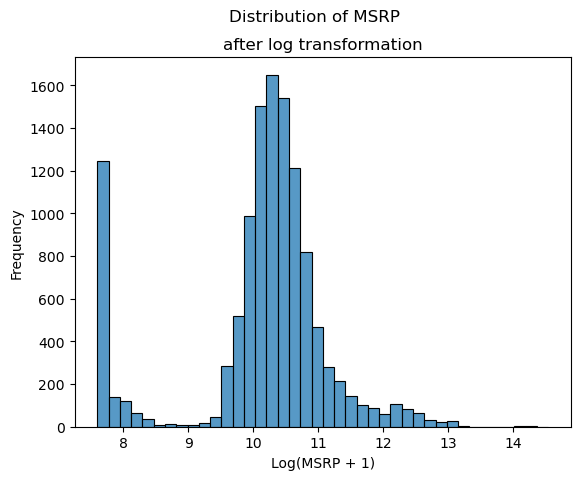

In [84]:
# Plotting the normalized MSRP data

sns.histplot(price_logs, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Log(MSRP + 1)')
plt.suptitle('Distribution of MSRP')
plt.title('after log transformation')

plt.show()

Missing values

In [93]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework

In [18]:
print(f'Total Records: {df.shape[0]}')

Total Records: 11914


### validation, training, test.... sizing

Let's draw it

In [225]:
n = len(df) # number of records
n_val = int(n * 0.2) #20% for validation
n_test = int(n * 0.2) #20% for test
n_train = n - (n_val + n_test) #60% for training

In [9]:
print(f'n: {n}')
print(f'n_val: {n_val}')
print(f'n_test: {n_test}')
print(f'n_train: {n_train}')

n: 11914
n_val: 2382
n_test: 2382
n_train: 7150


#### Shuffling the data

In [226]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


#### Splitting the data

`iloc` the first value is inclusive, while the 2nd value is exclusive.

In [227]:
df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_val]
df_test = df_shuffled.iloc[n_train+n_val:]

### Data formatting

In [228]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [14]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [229]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [230]:
# original values from the target
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

In [231]:
# apply the log transformation in original values
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [232]:
# To avoid accidentally using the target variable
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 2.5 Linear regression

$$
g(x_i) = w_0 + \sum_{j=0}^{n-1} w_j x_{ij}
$$

In [19]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [20]:
#feature matrix
xi = [453, 11, 86]
# bias term (weight when nothing is known)
w0 = 7.17
# Weight for each featre
w = [0.01, 0.04, 0.002]

In [21]:
# numpy dot product under the hood

def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        print(j,pred)
        
    return pred

In [22]:
linear_regression(xi)

0 11.7
1 12.139999999999999
2 12.312


12.312

In [23]:
np.expm1(12.312)

222347.2221101062

In [33]:
np.log1p(222347.2221101062)

12.312

In [34]:
np.expm1(13.08107460729463)

479775.00000000006

## 2.5 Linear regression (Solutions)

draw

In [41]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [ ]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [ ]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [ ]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [ ]:
linear_regression(xi)

In [ ]:
np.expm1(12.312)

In [ ]:
np.log1p(222347.2221101062)

## 2.6 Linear regression vector form

Formula
$$
g(x_i) = w_0 + \sum_{j=0}^{n-1} w_j x_{ij}
$$
Vector - Vector multiplication


In [35]:
np_xi = np.array(xi)
np_xi

array([453,  11,  86])

In [36]:
np_w = np.array(w)  
np_w 

array([0.01 , 0.04 , 0.002])

In [37]:
np_xi.dot(np_w)

5.142

In [38]:
np_w.dot(np_xi) + w0

12.312000000000001

In [39]:
result = 5.142 + 7.17
print(result)  # 12.312

12.312000000000001


simplified

In [40]:
new_w = [w0] + w
new_w

[7.17, 0.01, 0.04, 0.002]

In [41]:
new_xi = [1] + xi
new_xi

[1, 453, 11, 86]

In [42]:
np.array(new_xi).dot(np.array(new_w))

12.312000000000001

### applying to multiple data-points

In [43]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = [x1,x2,x3]

X = np.array(X)

X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [44]:
X.dot(new_w)

array([12.38 , 13.552, 12.312])

## 2.6 Linear regression vector form (Solutions)

In [93]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [91]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [89]:
w_new = [w0] + w

In [ ]:
w_new

In [94]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [95]:
linear_regression(xi)

12.312

In [ ]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [ ]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

In [114]:
def linear_regression(X):
    return X.dot(w_new)

In [115]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

when solving for weights ALWAYS find the dot product of XT *(X Transposed)* and X.

In [94]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [95]:
# getting an array of ones to use/par w/ w0 (base weight)
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [96]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [108]:
#target

y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]


In [98]:
#Grahm matrix/ transpose

XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [ ]:
# finding inverse of matrix

XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

**Purpose of inverse of XTX:**

- 𝑛 = number of data points (rows)

- 𝑝 = number of features (columns)

In linear regression, we want to find a set of weights 𝑤 (also called coefficients or parameters) that best fit the model:
$$
y=Xw+ε
$$
where
- 𝑦 is an 
𝑛
×
1
 vector of target values,

- 𝑋
is an 
𝑛
×
𝑝
 matrix of features,

- 𝑤
is a 
𝑝
×
1
 vector of weights,


- ε is the error term *(difference between actual and predicted)*.

In [109]:
# determing weights for each feature

w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [110]:
# Bias term
w0 = w_full[0]

# Weights per feature
w = w_full[1:]


In [111]:
w0, w

(25844.754055766767, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [144]:
def linear_regression(X, y):
    X_0 = np.ones(X.shape[0])
    X = np.column_stack([X_0, X])
    
    XTX = X.T.dot(X) # multiplying the transpose of X by X itself.
    XTX_inverse = np.linalg.inv(XTX)
    
    w = XTX_inverse.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [122]:
linear_regression(X,y)

(25844.754055766767, array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.7 Training a linear regression model (solutions)

In [ ]:
def train_linear_regression(X, y):
    pass

In [118]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [47]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [ ]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [ ]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [ ]:
w0 = w_full[0]
w = w_full[1:]

In [ ]:
w0, w

In [119]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [120]:
train_linear_regression(X, y)

(25844.754055766767, array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Car price baseline model

In [142]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [279]:
def linear_regression(X, y):
    X_0 = np.ones(X.shape[0])
    X = np.column_stack([X_0, X])
    
    XTX = X.T.dot(X) # multiplying the transpose of X by X itself.
    XTX_inverse = np.linalg.inv(XTX)
    
    w = XTX_inverse.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [202]:
def prepare_X(df):
    columns = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] #features used to predict target variable
    
    df_features = df[columns]
    
    df_features = df_features.fillna(0)
    
    x = df_features.values
    
    return x

X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)
#y_predict = w_0 + X_train.dot(w)

X_val = prepare_X(df_val)

y_pred = w_0 + X_val.dot(w)
y_pred

array([ 9.86288014, 10.37013608,  9.69868129, ..., 10.4916625 ,
        9.57091361, 10.40022147])

In [26]:
X_train, y_train

(array([[ 148.,    4.,   33.,   24., 1385.],
        [ 132.,    4.,   32.,   25., 2031.],
        [ 148.,    4.,   37.,   28.,  640.],
        ...,
        [ 285.,    6.,   22.,   17.,  549.],
        [ 563.,   12.,   21.,   13.,   86.],
        [ 200.,    4.,   31.,   22.,  873.]]),
 array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
        12.62248099, 10.54061978]))

In [27]:
w_0, w

(7.927257388069937,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [28]:
y_predict

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


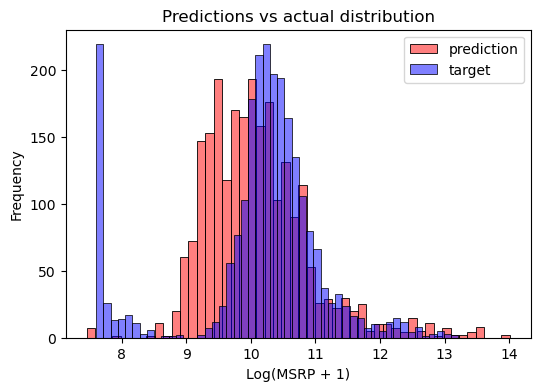

In [203]:
#plotting predictions
plt.figure(figsize=(6, 4))

sns.histplot(y_pred, label='prediction',color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label = 'target', color='blue', alpha=0.5, bins=50)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(MSRP + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## **2.9 RMSE**

### Root Mean Square Error (RMSE) Formula

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

Where:
- $y_i$ = actual value
- $\hat{y}_i$ = predicted value
- $n$ = number of observations

**Simple Definition:**

RMSE tells you the average distance between what your model predicted and what actually happened, in the same units as your target variable.

In [48]:
def mse_rmse(y, y_predict):
    error = y - y_predict
    mse = (error**2).mean()
    rmse = np.sqrt(mse)

    return mse, rmse

In [100]:
def rmse(y, y_predict):
    error = y - y_predict
    mse = (error**2).mean()
    rmse = np.sqrt(mse)

    return rmse

In [204]:
rmse(y_val, y_pred)

0.761653099130157

## 2.10 Validating the model

The Purpose of `Train` vs. `Validation Sets`
When you train a model, it learns patterns from the training data. If you only evaluate the model on the same data it was trained on, you're essentially asking "How well does the model memorize the training data?" rather than "How well does the model generalize to new, unseen data?"

Why Predict on Validation Data?
The validation set serves as a proxy for real-world, unseen data. Here's what happens in your code:

Key Reasons:
1. **Detecting Overfitting:** If your model performs well on training data but poorly on validation data, it means the model has overfit (memorized training patterns that don't generalize)

2. **True Performance Metric:** The validation RMSE tells you how well your model will likely perform on completely new data in production

3. **Model Selection:** When comparing different models or hyperparameters (like you do in 2.14 Tuning the model), you use validation performance to choose the best option

4. **Honest Assessment:** Training error will almost always be lower than validation error because the model has "seen" that data before

In [205]:
columns = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] #features used to predict target variable

def prepare_X(df):
    df_num = df[columns]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [207]:
X_train = prepare_X(df_train)
w0, w = linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.761653099130157

In [ ]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)
y_predict = w_0 + X_train.dot(w)

## 2.11 Simple feature engineering

 Handling numerical variables


In [270]:
def prepare_X(df):
    df = df.copy() #does not overwrite original data-frame
    
    df['age'] = 2017 - df['year']
    features = columns + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [272]:
X_train = prepare_X(df_train)
w0, w = linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5172055461058324

c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


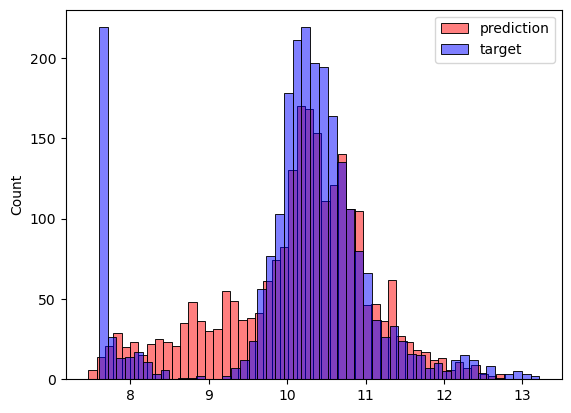

In [210]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## 2.12 Categorical variables

Handling categorical data involves converting the categorical variables into a form that can be easily understood and processed by machine learning algorithms. One common method to achieve this is `one-hot encoding`, which **creates binary features for each distinct category**.

- Typically strings

**Example:**  *# of doors*

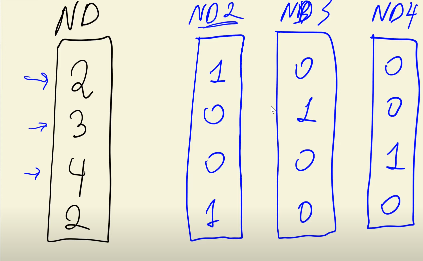



In [ ]:
# converting categorical data into 
df_train['num_doors_1'] = (df_train.number_of_doors == 1).astype(int)
df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype(int)
df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype(int)
df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype(int)

0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int32

In [ ]:
for v in [2,3,4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype(int).copy()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [92]:
df_train.number_of_doors.value_counts()

number_of_doors
4.0    5000
2.0    1916
3.0     228
Name: count, dtype: int64

In [401]:
makes = np.array(df.make.value_counts().head().index)
makes

array(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype=object)

In [ ]:
category_variable = [
    'make',
    'market_category',
    'vehicle_size',
    'vehicle_style',
    'transmission_type',
    'driven_wheels',
    'engine_fuel_type'
]

In [367]:
categories ={}

for c in category_variable:
    categories[c] = list(df_train[c].value_counts().head().index)
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel']}

In [391]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['year']
    features = columns + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df['number_of_doors'] == v).astype(int)
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c, v))

    df_num = df[features]
    df_num=df_num.fillna(0)

    x = df_num.values

    return x

In [392]:
X_train = prepare_X(df_train)
X_train

array([[148.,   4.,  33., ...,   0.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   0.],
       [148.,   4.,  37., ...,   0.,   0.,   0.],
       ...,
       [285.,   6.,  22., ...,   0.,   1.,   0.],
       [563.,  12.,  21., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   1.,   0.,   0.]])

In [510]:
X_train = prepare_X(df_train)
w0, w = linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

117.82814202271044

In [394]:
w0, w

(-6978332781570588.0,
 array([ 5.49131215e-01, -6.99881516e+01, -4.21248050e+00,  5.25074278e+00,
        -1.09474060e-02, -1.52216935e+00,  6.93891606e+03,  6.97211095e+03,
         6.93251751e+03,  5.52872457e+00,  4.22595886e+01, -4.46738563e+01,
        -9.21204079e+00, -7.63086981e+00,  8.89941294e+00, -1.02705610e+01,
         1.14536218e+00, -4.83056955e+01,  3.27209318e+01, -2.36973689e+16,
        -2.36973689e+16, -2.36973689e+16,  3.15717139e+00,  2.70421705e+00,
         1.87971567e+01,  2.28590634e+01, -1.63306136e+01,  3.06757017e+16,
         3.06757017e+16,  3.06757017e+16,  3.06757017e+16,  3.06757017e+16,
         5.29476927e+02,  4.86138459e+02,  4.92467762e+02,  4.55137147e+02,
        -4.61172642e-01,  6.90591028e-02, -3.27355835e-01, -5.40202560e-01,
        -9.20899158e-02]))

c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


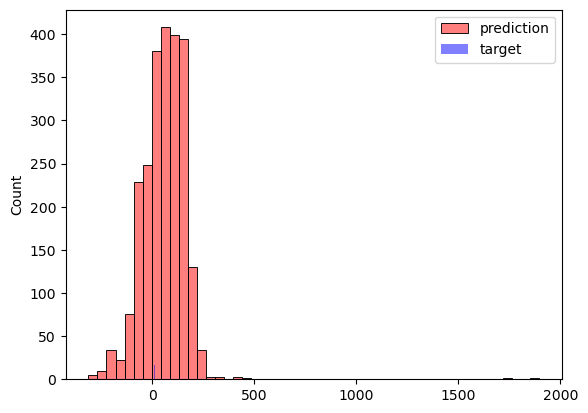

In [395]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## 2.13 Regularization

In [491]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [430]:
y= [1, 2, 3, 1, 2, 3]

In [492]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [493]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [413]:
XTX_inv

array([[ 0.04670793, -0.1558807 ,  0.11311199],
       [-0.1558807 ,  1.71299943, -1.61845807],
       [ 0.11311199, -1.61845807,  1.57512661]])

In [380]:
XTX_inv.dot(X.T).dot(y)

NameError: name 'XTX_inv' is not defined

In [506]:
XTX = [
    [1,2,2],
    [2,1,1.00001],
    [2,1.00001,1]
]

XTX = np.array(XTX)
XTX

array([[1.     , 2.     , 2.     ],
       [2.     , 1.     , 1.00001],
       [2.     , 1.00001, 1.     ]])

In [502]:
np.linalg.inv(XTX)

array([[-3.33669114e-01,  3.33500696e-01,  3.33500696e-01],
       [ 3.33500696e-01,  5.04967047e+02, -5.05133964e+02],
       [ 3.33500696e-01, -5.05133964e+02,  5.04967047e+02]])

In [508]:
XTX = XTX + 0.01 * np.eye(3)

XTX

array([[1.01   , 2.     , 2.     ],
       [2.     , 1.01   , 1.00001],
       [2.     , 1.00001, 1.01   ]])

In [509]:
np.linalg.inv(XTX)

array([[ -0.3366913 ,   0.33501455,   0.33501455],
       [  0.33501455,  49.96545888, -50.13464122],
       [  0.33501455, -50.13464122,  49.96545888]])

In [511]:
def train_linear_regression_reg(X, y, r=0.001 ):
    X_0 = np.ones(X.shape[0])
    X = np.column_stack([X_0, X])
    
    XTX = X.T.dot(X) # multiplying the transpose of X by X itself.
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inverse = np.linalg.inv(XTX)
    
    w = XTX_inverse.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [512]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4565219901159868

c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


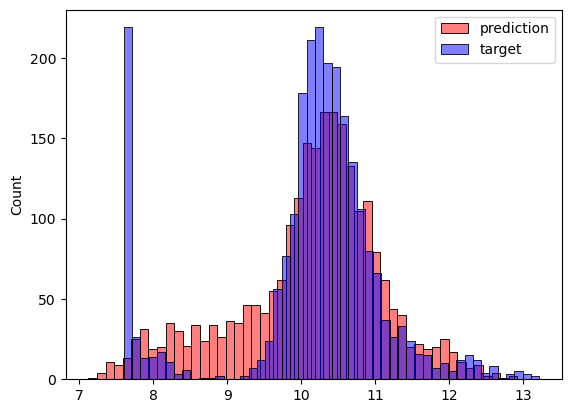

In [513]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## 2.14 Tuning the model

In [ ]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

In [ ]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

## 2.15 Using the model

In [ ]:
df_full_train = pd.concat([df_train, df_val])

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
X_full_train = prepare_X(df_full_train)

In [ ]:
X_full_train

In [ ]:
y_full_train = np.concatenate([y_train, y_val])

In [ ]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [ ]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

In [ ]:
car = df_test.iloc[20].to_dict()
car

In [ ]:
df_small = pd.DataFrame([car])
df_small

In [ ]:
X_small = prepare_X(df_small)

In [ ]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

In [ ]:
np.expm1(y_pred)

In [ ]:
np.expm1(y_test[20])

## 2.16 Next steps

* We included only 5 top features. What happens if we include 10?

Other projects

* Predict the price of a house - e.g. boston dataset
* https://archive.ics.uci.edu/ml/datasets.php?task=reg
* https://archive.ics.uci.edu/ml/datasets/Student+Performance

## 2.17 Summary

* EDA - looking at data, finding missing values
* Target variable distribution - long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight numerical instability